# Thesis Notes

## Introduction

The motivation behind statistical learning is to identify the relationship between variables using observations or realized datasets. Particularly, the relationship between the independent variables and the depended variable or the input and the output. Let $Y$ be the output or the response and $X_{1}, X_{2}, \ldots , X_{p-1}, X_{p}$ be the inputs or the predictors. Generally, we can assume that this relationship can be expressed into the following general form $$Y = F(X) + \epsilon.$$ Here, $X = X_{1}, X_{2}, \ldots , X_{p-1}, X_{p}$, $F$ is some fixed but unknown function of the predictors and $\epsilon$ be some random noise. In this form, $F$ represents the systematic information that the inputs provides about the output. Identifying or estimating $F$ is valueble as it will give us the ability to make predictions and inferences. \
In this research, we assume that the dataset is finite.

### Prediction

In many settings, the input variables or predictors has been observed and are readily available and we want to use it to predict the value or outome of the output or the response. In this case, we assume that the random error has a mean of $0$. We can then predict $Y$ using  $$\hat{Y} = \hat{F}(X),$$ where $\hat{F}$ is our estimate for $F$. For prediction, we are typically not concerned of the actual form of $\hat{F}$ as long as it produces the most accurate results. Generally, $\hat{F}$ will not be a perfect estimate of $F$, thus errors will be introduced. There are two types of error that affects the accuracy of $\hat{F}$:

- **Reducible Error**: Errors that can be further reduced to improve the affuracy of $\hat{F}$.
- **Irreducible Error**: Errors that is inherent in $Y$ and independent from $F$, like from $\epsilon$, thus cannot be further reduced.

If we fix $\hat{F}$ and $X$, so that the only variability comes from $\epsilon$. Then we can see that 
\begin{align*}
E[(Y-\hat Y)^2] &= E[ (F(X) + \epsilon - \hat F(X))^2 ]\\
&= \underbrace{[ F(X) - \hat F(X) ]^2}_{\text{Reducible}} + \underbrace{Var(\epsilon)}_{\text{Irreducible}}
\end{align*}
where $E[Y-\hat Y]$ is the expected squared difference between the predicted and actual value of $Y$, and $Var(\epsilon)$ represents the *variance* associated with the error term $\epsilon$.

### Inference

In this approach, we are more interested in the actual form of $F$. Thus the estimated form, $\hat{F}$, is important to know. Answering the following guide questions might be important to know:

- What predictors are associated with the response?
- What is the relationship between the response and each predictor?
- Can the relationship between Y and each predictor be adequately summarized using a linear equation, or the relationship is more complicated?

### Estimating $F$

#### Loss Function
In statistical learning, the loss function, also known as the objective/error/cost function, is one of the most important aspects in estimating a function. The 'loss' is the measure of how good our model's prediction is to the to the actual value and we can get the value of this measure by defining a loss function. The most frequently employed loss functions include squared-error $l(y_{actual}, y_{predicted}) = (y_{actual} - y_{predicted})$ and absolute error $l(y_{actual}, y_{predicted}) =|y_{actual} - y_{predicted}|$ for regression and negative binomial log-likelihood $l(y_{actual}, y_{predicted}) =log(1+ e^{2y_{actual}y_{predicted}})$ for classification. [IBM](https://www.ibm.com/think/topics/loss-function) Friedman. Now, one way to measure of how good the estimated model $F'(x)$ is given the training data $\{(x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n)\}$ is called the empirical risk given by $$L(F'(x)) = \dfrac{1}{n}\sum_{i=1}^{n} l(y_i,F'(x_i))$$ which is the average loss of the estimated model $F'(x)$ over the dataset. [Stanford](https://ee104.stanford.edu/lectures/erm.pdf) \
The loss function gives us a measurable guide in estimating $F$. That is, if we let $x_{ij}$ be the value of the jth predictor for observation $i$, where $i = 1,2,\ldots,n$ and $j=1,2,\ldots,p$ and let $y_{i}$ be the value of the response variable for the ith observation. Generally, to estimate $F$ using the training dataset $\{(x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n)\}$ where $x_i=(x_{i1},x_{i2},\ldots,x_{ip})^T$, we need to apply statistical learning methods to find a function $\hat{F}$ such that it miminizes the empirical risk. However, we must be careful on this regard since minimizing the empirical risk alone may lead to overfitting, which can make our estimate perform worse [Ying](https://www.researchgate.net/publication/331677125_An_Overview_of_Overfitting_and_its_Solutions), we will introduce safeguards later on to prevent this. Most statistical learning methods can be characterized as either *parametric* or *non-parametric*.

*insert and Convexness

#### Parametric
In a parametric approach, we usually assume the form of the actual function $F$ which reduces the problem of estimating it into a numerical optimization problem. In other words, in a parametric approach, if we want to estimate some function $F(x)$ using a training dataset $\{(x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n)\}$, we choose some parametrized function $F'(x;\phi)$ and solve for the optimal parameters 
\begin{align*}
\phi^* &= \arg\min_{\phi} L(\phi) \\
&= \arg\min_{\phi} \dfrac{1}{n}\sum_{i=1}^{n} l(y_i,F'(x_i;\phi))
\end{align*} 
where $L(\phi)$ is the empirical risk (which would be a function of the parameters $\phi$) and $l(y_i,F'(x_i;\phi))$ is the defined loss function. Most of the time, we can solve for the parameters $\phi^*$ using numerical optimization methods. Once obtained, our estimate for $F(x)$ is given by: $$F(x) \approx F'(x;\phi^*).$$ *insert example

#### Non-Parametric
In a non-parametric approach, we do not presuppose a specific functional form for the underlying function $F$. Instead, the form of $F$ is inferred directly from the data, allowing for a flexible model that can adapt to the data's structure. Non-parametric methods are data-driven, meaning that the complexity of the model typically grows with the size of the dataset. \
To estimate $F$, we focus on constructing an appropriate function $F'(x)$ that accurately describes the relationship between the predictor $x$ and the target variable $y$, without parameterizing it in a fixed form. A general goal is to minimize a loss function, often expressed as: $$\phi(F') = \sum_{i=1}^{n} l(y_i,F'(x_i))$$ given the data $\{(x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n)\}$.

In practice, non-parametric approaches can involve methods like:

- K-Nearest Neighbors (KNN): Estimates the function $F$ by averaging the outputs of the nearest neighbors for a given data point.
- Kernel Methods: Use kernel functions to weigh nearby observations more heavily, such as Kernel Density Estimation for density estimation.
- Smoothing Splines: Fit smooth curves to data by balancing between fit and smoothness, often involving some optimization in function space.

While some non-parametric techniques do involve optimization (like smoothing splines), they often focus on the selection and application of local properties or constraints inferred from the data, rather than on a global parametric form. 

**Sources:**
- Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning: Data Mining, Inference, and Prediction*. Springer Science & Business Media.
- Wasserman, L. (2006). *All of Nonparametric Statistics*. Springer Science & Business Media.
- Bishop, C. M. (2006). *Pattern Recognition and Machine Learning*. Springer.


## Tree-Based Methods

### Regression Trees

Decision trees stratifies or segments the predictor space into a number of simple regions. To make predictions or classifications, we typically use the mean or the mode of the values of the observations/training data in the predictor region. It can be visualized by the following plot.

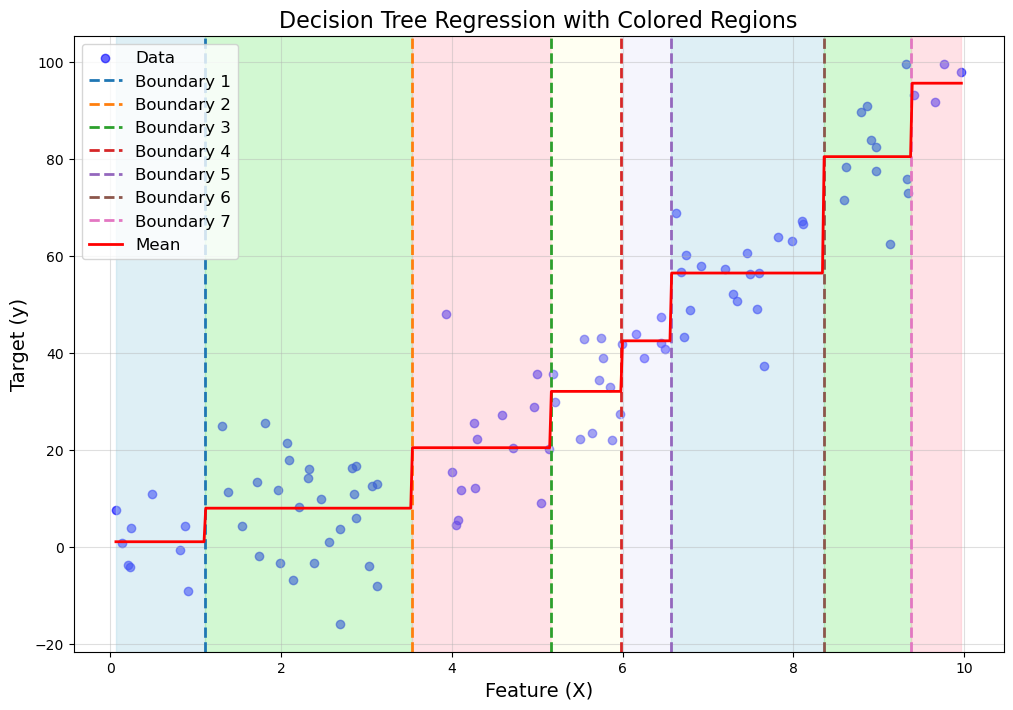

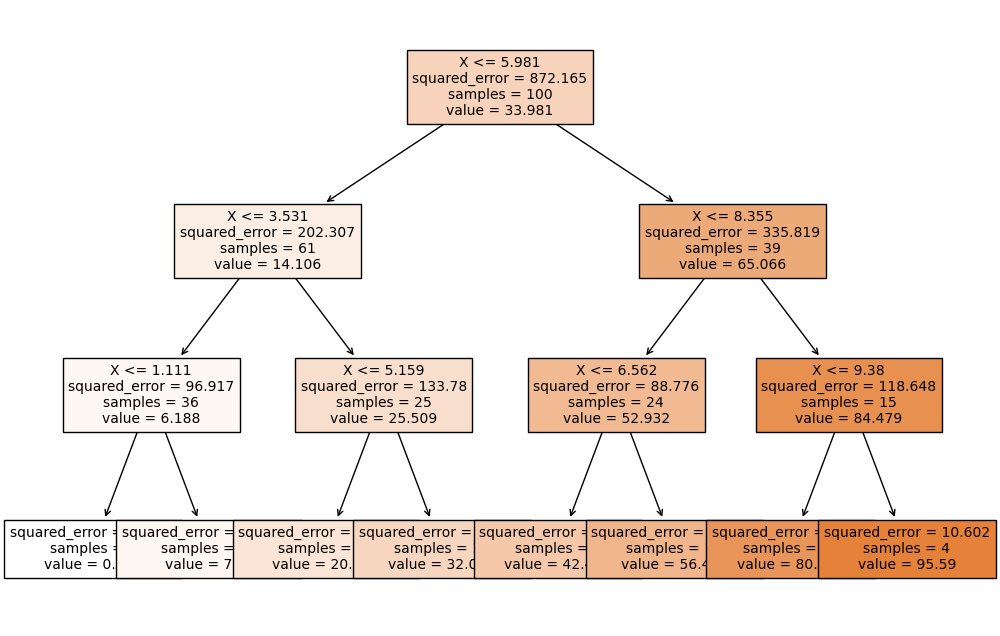

In [20]:
from regtree_vis import vis_regtree
vis_regtree()

The regression tree is constructed by dividing the predictor space into into distinct and non-overlapping regions, $R_j$, which is then characterized by the mean/mode or mean response of the values of all the observation within that region. In finding these regions, it would be computationally expensive and impossible, especially when working with high-dimensional rectangles, to check for every combination of regions that minimizes the Residual Sum of Squares given by $$\sum_{j = 1}^J \sum_{i \in R_j} (y_i - \hat y_{R_j})^2$$ where $\hat y_{R_j}$ is the mean response for the training observations in the jth region.

#### Recursive Binary Splitting

*Recursive Binary Splitting* is an approach used to create regression trees. It is a greedy top-down approach that begins with one predictor space and picks the best split that minimizes the RSS,  then repeats this on the smaller predictor space until a limiting parameter is reached. It splits the predictor regions into $\{X|X_j < s\}$ and $\{X|X_j \ge s\}$ where $s$ is the cut point of the predictor $X_j$ such that it has the smallest value for the RSS in that iteration. In other words, for every $j$ and $s$, we define the pair of half-planes $$R_1(j,s) = \{X|X_j < s\} \text{ and } R_2(j,s) = \{X|X_j \ge s\}$$ we then choose $j,s$ that minimizes the values of $$\sum_{i:x_i \in R_1(j,s)}(y_i - \hat{y}_{R_1})^2 + \sum_{i:x_i \in R_2(j,s)}(y_i - \hat{y}_{R_2})^2$$ where $\hat{y}_{R_1}$ is the mean response for the training observations in $R_1(j,s)$ and $\hat{y}_{R_2}$ is the mean response for the training observations in $R_2(j,s)$.\
 **This approach is greedy because it only chooses the split that minimizes the RSS every iteration and does not take the RSS of the final tree into consideration.** 

#### Recursive Binary Splitting From Scratch
 The code below demonstrates a way on how we can build regression trees from scratch.

In [ ]:
import pandas as pd
import numpy as np

class Node:
    def __init__(self, train_datapoints: pd.DataFrame, target,
                 is_Terminal: bool = True, split: float = None, feature: str = None,
                 lt_node=None, gte_node=None,  
                 parent=None, depth: int = 0,
                 generate: bool = False, max_depth: float = float('inf'), min_points: int = 1):
        self.train_datapoints = train_datapoints
        self.target = target
        self.mean = np.array(self.train_datapoints[target]).mean()
        self.err = np.sum((np.array(self.train_datapoints[target]) - self.mean)**2)
        self.is_Terminal = is_Terminal
        self.split = split
        self.feature = feature
        self.lt_node = lt_node
        self.gte_node = gte_node
        self.parent = parent
        self.depth = depth
        self.generate = generate
        self.max_depth = max_depth
        self.min_points = min_points
        # This allows nodes to recursively generate children nodes until the max_depth or the min_points has been reached.
        if self.generate and self.depth <= self.max_depth and self.train_datapoints.shape[0] >= self.min_points:
            self.create_child(generate=self.generate, max_depth=self.max_depth, min_points=self.min_points)

    def add_Nodes(self, lt_node, gte_node):
        self.lt_node = lt_node
        self.gte_node = gte_node
        self.lt_node.parent = self
        self.gte_node.parent = self
        self.is_Terminal = False

    def evaluate_point(self, features):
        if self.is_Terminal:
            # print(f"The value is: {self.mean}")
            return self.mean
        else:
            if features[self.feature] < self.split:
                return self.lt_node.evaluate_point(features)
            else:
                return self.gte_node.evaluate_point(features)

    def create_child(self, generate: bool = False, max_depth: float = float('inf'), min_points: int = 1):
        # If generate = True, it will recursively create children nodes.
        # This method will find the best split of the datapoints on each node that minimizes the sse.
        def feature_best_split(X, y):
            # This function chooses the best split for the individual features.
            X_sorted, y_sorted = np.array(X), np.array(y)

            best_sse = float('inf')
            best_split = None
            for i in range(1, len(X_sorted)):
                s = (X_sorted[i-1] + X_sorted[i]) / 2  # Candidate split point
                left_mask = X_sorted <= s
                right_mask = X_sorted > s

                y_left, y_right = y_sorted[left_mask], y_sorted[right_mask]

                if len(y_left) == 0 or len(y_right) == 0:
                    continue  # Skip empty splits

                sse = np.sum((y_left - y_left.mean())**2) + np.sum((y_right - y_right.mean())**2)

                if sse < best_sse: # Getthing the best split that minimises the SSE for that particular feature
                    best_sse, best_split = sse, s
            return best_split, best_sse

        def best_split(df: pd.DataFrame, target):
            # This function chooses the best split among all features .
            best_sse = float('inf')
            best_s = None
            best_feature = None
            for feature in df.columns:
                if feature == target:
                    continue
                df_sorted = df.sort_values(by=feature)
                split, sse = feature_best_split(df_sorted[feature], df_sorted[target])
                if sse < best_sse: # Getthing the best split among all features that minimises the SSE
                    best_sse, best_s, best_feature = sse, split, feature
            return best_sse, best_s, best_feature

        _, best_s, best_feature = best_split(self.train_datapoints, self.target)

        
        # The algorithm below uses the defined functions above to apply binary splitting

        if best_s is not None and best_feature is not None:
            self.split = best_s
            self.feature = best_feature

            lt_points = self.train_datapoints[self.train_datapoints[best_feature] < best_s]
            gte_points = self.train_datapoints[self.train_datapoints[best_feature] >= best_s]

            if len(lt_points) > self.min_points and len(gte_points) > self.min_points:
                lt_node = Node(train_datapoints=lt_points, target=self.target, depth=self.depth + 1,
                               generate=generate, max_depth=max_depth, min_points=min_points)
                gte_node = Node(train_datapoints=gte_points, target=self.target, depth=self.depth + 1,
                                generate=generate, max_depth=max_depth, min_points=min_points)
                self.add_Nodes(lt_node=lt_node, gte_node=gte_node)

    def generate_children(self, max_depth: float, min_points: int):
        # This method initiates the recursive binary splitting from the root node and recursively builds the nodes of the tree.
        # The stopping criteria is the max_depth (the maximum depth for each node) and the min_points (the minimum training datapoints a node can contain)
        if self.is_Terminal:
            self.create_child(generate=True, max_depth=max_depth, min_points=min_points)

class Tree:
    def __init__(self, root_node: Node = None, training_data: pd.DataFrame = None, target: str = None):
        self.root_node = root_node       
        self.training_data = training_data
        self.target = target
        self.features = None
        self.depth = None
        self.err = float('inf') # The training SSE of the tree
        self.residuals = None
        if self.target is not None:
            self.get_features()

    def load_data(self, training_data: pd.DataFrame, target: str):
        if self.training_data is None:
            self.training_data = training_data
            self.target = target
        else:
            print("Data has already been loaded!")

    def create_root_node(self):
        if self.root_node is None:
            if self.training_data is None:
                print("Load the data first!")
            else:
                self.root_node = Node(train_datapoints=self.training_data, target=self.target)
        else:
            
            print("The tree already has a root node!")

    def evaluate(self, feature_set: pd.DataFrame):
        if self.root_node is None:
            print("Generate a tree first!")
        else:
            predictions = []
            for _, features in feature_set.iterrows():
                predictions.append(self.root_node.evaluate_point(features))
            return np.array(predictions)
        
    def get_features(self):
        features = []
        for feature in self.training_data.columns:
            if feature == self.target:
                continue
            features.append(feature)
        self.features = features

    def calculate_error(self):
        self.err = np.sum((np.array(self.training_data[self.target]) - self.evaluate(self.training_data[self.features]))**2)

    def calculate_residuals(self):
        self.residuals = np.array(self.training_data[self.target]) - self.evaluate(self.training_data[self.features])

    def generate_tree(self, max_depth: float = float('inf'), min_points: int = 1):
        if self.root_node is None:
            self.create_root_node()
        self.root_node.generate_children(max_depth=max_depth, min_points=min_points)
        self.calculate_error()
        self.calculate_residuals()


In [1]:
import pandas as pd
import numpy as np

class Node:
    def __init__(self, X: pd.DataFrame, y: pd.Series,
                 is_Terminal: bool = True, split: float = None, feature: str = None,
                 lt_node=None, gte_node=None,  
                 parent=None, depth: int = 0,
                 generate: bool = False, max_depth: float = float('inf'), min_points: int = 1):
        self.X = X
        self.y = y
        self.mean = y.mean()
        self.err = np.sum((y - self.mean)**2)
        self.is_Terminal = is_Terminal
        self.split = split
        self.feature = feature
        self.lt_node = lt_node
        self.gte_node = gte_node
        self.parent = parent
        self.depth = depth
        self.generate = generate
        self.max_depth = max_depth
        self.min_points = min_points
        # This allows nodes to recursively generate children nodes until the max_depth or the min_points has been reached.
        if self.generate and self.depth <= self.max_depth and self.X.shape[0] >= self.min_points:
            self.create_child(generate=self.generate, max_depth=self.max_depth, min_points=self.min_points)

    def add_Nodes(self, lt_node, gte_node):
        self.lt_node = lt_node
        self.gte_node = gte_node
        self.lt_node.parent = self
        self.gte_node.parent = self
        self.is_Terminal = False

    def evaluate_point(self, features):
        if self.is_Terminal:
            return self.mean
        else:
            if features[self.feature] < self.split:
                return self.lt_node.evaluate_point(features)
            else:
                return self.gte_node.evaluate_point(features)

    def create_child(self, generate: bool = False, max_depth: float = float('inf'), min_points: int = 1):
        def feature_best_split(X, y):
            X_sorted, y_sorted = np.array(X), np.array(y)

            best_sse = float('inf')
            best_split = None
            for i in range(1, len(X_sorted)):
                s = (X_sorted[i-1] + X_sorted[i]) / 2  # Candidate split point
                left_mask = X_sorted <= s
                right_mask = X_sorted > s

                y_left, y_right = y_sorted[left_mask], y_sorted[right_mask]

                if len(y_left) == 0 or len(y_right) == 0:
                    continue  # Skip empty splits

                sse = np.sum((y_left - y_left.mean())**2) + np.sum((y_right - y_right.mean())**2)

                if sse < best_sse: # Getting the best split that minimizes the SSE for that particular feature
                    best_sse, best_split = sse, s
            return best_split, best_sse

        def best_split(X: pd.DataFrame, y: pd.Series):
            best_sse = float('inf')
            best_s = None
            best_feature = None
            for feature in X.columns:
                X_sorted = X.sort_values(by=feature)
                split, sse = feature_best_split(X_sorted[feature], y[X_sorted.index])
                if sse < best_sse: # Getting the best split among all features that minimizes the SSE
                    best_sse, best_s, best_feature = sse, split, feature
            return best_sse, best_s, best_feature

        _, best_s, best_feature = best_split(self.X, self.y)

        if best_s is not None and best_feature is not None:
            self.split = best_s
            self.feature = best_feature

            lt_mask = self.X[best_feature] < best_s
            gte_mask = self.X[best_feature] >= best_s

            lt_X, lt_y = self.X[lt_mask], self.y[lt_mask]
            gte_X, gte_y = self.X[gte_mask], self.y[gte_mask]

            if len(lt_X) > self.min_points and len(gte_X) > self.min_points:
                lt_node = Node(X=lt_X, y=lt_y, depth=self.depth + 1,
                               generate=generate, max_depth=max_depth, min_points=min_points)
                gte_node = Node(X=gte_X, y=gte_y, depth=self.depth + 1,
                                generate=generate, max_depth=max_depth, min_points=min_points)
                self.add_Nodes(lt_node=lt_node, gte_node=gte_node)

    def generate_children(self, max_depth: float, min_points: int):
        if self.is_Terminal:
            self.create_child(generate=True, max_depth=max_depth, min_points=min_points)

class Tree:
    def __init__(self, root_node: Node = None, X: pd.DataFrame = None, y: pd.Series = None):
        self.root_node = root_node       
        self.X = X
        self.y = y
        self.features = None
        self.depth = None
        self.err = float('inf') # The training SSE of the tree
        self.residuals = None
        if self.y is not None:
            self.get_features()

    def load_data(self, X: pd.DataFrame, y: pd.Series):
        if self.X is None:
            self.X = X
            self.y = y
        else:
            print("Data has already been loaded!")

    def create_root_node(self):
        if self.root_node is None:
            if self.X is None:
                print("Load the data first!")
            else:
                self.root_node = Node(X=self.X, y=self.y)
        else:
            print("The tree already has a root node!")

    def evaluate(self, feature_set: pd.DataFrame):
        if self.root_node is None:
            print("Generate a tree first!")
        else:
            predictions = []
            for _, features in feature_set.iterrows():
                predictions.append(self.root_node.evaluate_point(features))
            return np.array(predictions)
        
    def get_features(self):
        self.features = self.X.columns.tolist()

    def calculate_error(self):
        self.err = np.sum((self.y - self.evaluate(self.X))**2)

    def calculate_residuals(self):
        self.residuals = self.y - self.evaluate(self.X)

    def generate_tree(self, max_depth: float = float('inf'), min_points: int = 1):
        if self.root_node is None:
            self.create_root_node()
        self.root_node.generate_children(max_depth=max_depth, min_points=min_points)
        self.calculate_error()
        self.calculate_residuals()



Trying the code to fit a synthetically generated dataset from the function $$y = 2X_1^2 + 3\cos(X_2) + \epsilon$$ where $y$ is the target variable and $X_1,X_2$ are features and $\epsilon \sim N(0,0.5)$ is the random noise.

In [1]:
import pandas as pd
import numpy as np
from regression_tree import Node, Tree
# Set random seed for reproducibility
np.random.seed(42)

# Generate 2 features
N = 1000  # Number of samples
X1 = np.random.uniform(-5, 7, N)  # Feature 1: Uniform between -2 and 2
X2 = np.random.uniform(0, np.pi, N)  # Feature 2: Uniform between 0 and π

# Define target variable with a nonlinear function and noise
noise = np.random.normal(0, 0.5, N)
y = 2 * X1**2 + 3 * np.cos(X2) + noise

# Create a DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
X = df[['X1', 'X2']]
y = df['y']
tree = Tree(X=X, y=y)
tree.generate_tree(max_depth=2, min_points=20)
print(tree.err)

37694.986177219966


In [2]:
from gradient_boost import GradientBoost
from loss_functions import SSR
gb = GradientBoost(loss_function=SSR(),n_estimators=100, learning_rate=0.1, max_depth=2, min_points=20)
gb.fit(X=X, y=y, init_tree=tree)

Iteration: 0, Loss: 37694.9862
Iteration: 1, Loss: 29572.5355
Iteration: 2, Loss: 24125.1010
Iteration: 3, Loss: 20484.1734
Iteration: 4, Loss: 17882.1270
Iteration: 5, Loss: 16106.4385
Iteration: 6, Loss: 14791.0475
Iteration: 7, Loss: 14107.1728
Iteration: 8, Loss: 13389.3419
Iteration: 9, Loss: 12948.6164
Iteration: 10, Loss: 12677.8893
Iteration: 11, Loss: 11892.5856
Iteration: 12, Loss: 10865.9357
Iteration: 13, Loss: 10634.0967
Iteration: 14, Loss: 9769.2053
Iteration: 15, Loss: 9316.6037
Iteration: 16, Loss: 9073.7710
Iteration: 17, Loss: 9035.9598
Iteration: 18, Loss: 8799.9665
Iteration: 19, Loss: 8697.8086
Iteration: 20, Loss: 7764.6158
Iteration: 21, Loss: 7711.8011
Iteration: 22, Loss: 7687.6361
Iteration: 23, Loss: 7663.8097
Iteration: 24, Loss: 6735.1482
Iteration: 25, Loss: 6713.5318
Iteration: 26, Loss: 6634.5906
Iteration: 27, Loss: 6469.3325
Iteration: 28, Loss: 6450.5836
Iteration: 29, Loss: 6067.2992
Iteration: 30, Loss: 5544.9547
Iteration: 31, Loss: 5213.2042
Iter

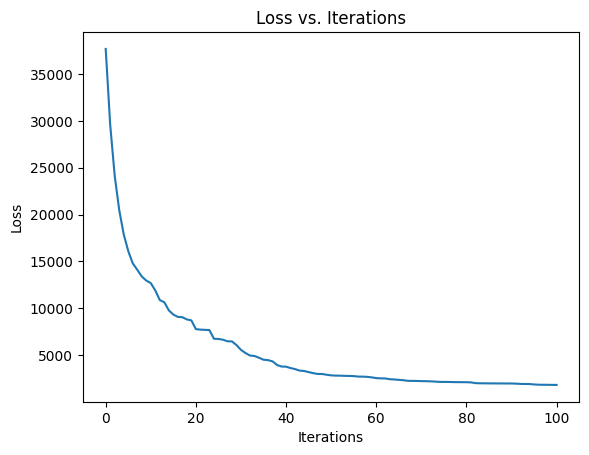

In [3]:
gb.plot_loss()

In [4]:
tree.evaluate(X)

array([ 7.36157718, 78.26470843, 28.53186442,  7.36157718,  7.36157718,
        7.36157718, 30.09846697, 62.52418186,  7.36157718, 28.53186442,
       43.68935544, 91.77991265, 46.50438591,  7.36157718,  7.36157718,
        7.36157718,  7.36157718,  7.36157718,  7.36157718,  7.36157718,
        7.36157718,  7.36157718,  7.36157718,  7.36157718,  7.36157718,
       28.53186442,  7.36157718,  7.36157718,  7.36157718, 43.68935544,
        7.36157718,  7.36157718, 30.09846697, 78.26470843, 91.77991265,
       46.50438591,  7.36157718, 30.09846697, 28.53186442,  7.36157718,
       30.09846697,  7.36157718, 43.68935544, 62.52418186,  7.36157718,
        7.36157718,  7.36157718,  7.36157718,  7.36157718,  7.36157718,
       91.77991265, 28.53186442, 78.26470843, 62.52418186,  7.36157718,
       78.26470843, 30.09846697,  7.36157718, 43.68935544,  7.36157718,
        7.36157718,  7.36157718, 46.50438591,  7.36157718,  7.36157718,
        7.36157718,  7.36157718, 46.50438591, 30.09846697, 91.77

In [7]:
predicted = gb.predict(X)
predicted

0       2.872259
1      83.001115
2      26.136899
3       8.054462
4      17.376935
         ...    
995    29.410864
996    72.434884
997    23.214238
998    83.809917
999     2.728531
Length: 1000, dtype: float64

In [8]:
gb.loss_function.loss(y,predicted=predicted)

np.float64(1804.2177448712064)

In [23]:
y

0       2.578841
1      81.332374
2      25.758800
3       7.722921
4      17.559882
         ...    
995    28.733403
996    69.724945
997    26.528796
998    84.151877
999     1.204288
Name: y, Length: 1000, dtype: float64

Trying the code to fit a synthetically generated dataset from the function $$y = 3X_1^2 + 2\sin(X_2) + 0.5X_3 + \epsilon$$ where $y$ is the target variable and $X_1,X_2,X_3$ are features and $\epsilon \sim N(0,0.5)$ is the random noise.

In [3]:
import pandas as pd
import numpy as np
from regression_tree import Node, Tree
# Set random seed for reproducibility
np.random.seed(42)

# Generate 3 features
N = 3000  # Number of samples
X1 = np.random.uniform(-10, 15, N)  # Uniformly distributed between -2 and 2
X2 = np.random.uniform(0, np.pi, N)  # Between 0 and π for sin function
X3 = np.random.normal(5, 2, N)  # Normally distributed around 5 with std 2

# Define target variable with nonlinear function and noise
noise = np.random.normal(0, 0.5, N)
y = 3 * X1**2 + 2 * np.sin(X2) + 0.5 * X3 + noise

# Create a DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})
X = df[['X1', 'X2', 'X3']]
y = df['y']
tree = Tree(X=X, y=y)
tree.generate_tree(max_depth=2, min_points=20)
print(tree.err)

4218869.661190018


In [4]:
from gradient_boost import GradientBoost
from loss_functions import SSR
gb = GradientBoost(loss_function=SSR(),n_estimators=200, learning_rate=0.1, max_depth=2, min_points=20)
gb.fit(X=X, y=y, init_tree=tree)

Iteration: 0, Loss: 4218869.6612
Iteration: 1, Loss: 3358138.7688
Iteration: 2, Loss: 2777206.5803
Iteration: 3, Loss: 2409832.4469
Iteration: 4, Loss: 2123495.3650
Iteration: 5, Loss: 1749029.1020
Iteration: 6, Loss: 1503569.1222
Iteration: 7, Loss: 1373404.4406
Iteration: 8, Loss: 1284869.5094
Iteration: 9, Loss: 1196693.0211
Iteration: 10, Loss: 1010920.8627
Iteration: 11, Loss: 975029.4760
Iteration: 12, Loss: 932078.8117
Iteration: 13, Loss: 850079.0123
Iteration: 14, Loss: 747100.5962
Iteration: 15, Loss: 704511.8471
Iteration: 16, Loss: 676568.3512
Iteration: 17, Loss: 658656.1846
Iteration: 18, Loss: 590420.0142
Iteration: 19, Loss: 563591.7667
Iteration: 20, Loss: 516212.1334
Iteration: 21, Loss: 460453.0149
Iteration: 22, Loss: 443615.1129
Iteration: 23, Loss: 423821.7404
Iteration: 24, Loss: 412246.3323
Iteration: 25, Loss: 410629.8902
Iteration: 26, Loss: 384511.2987
Iteration: 27, Loss: 356825.9879
Iteration: 28, Loss: 317952.7623
Iteration: 29, Loss: 309594.3737
Iteration

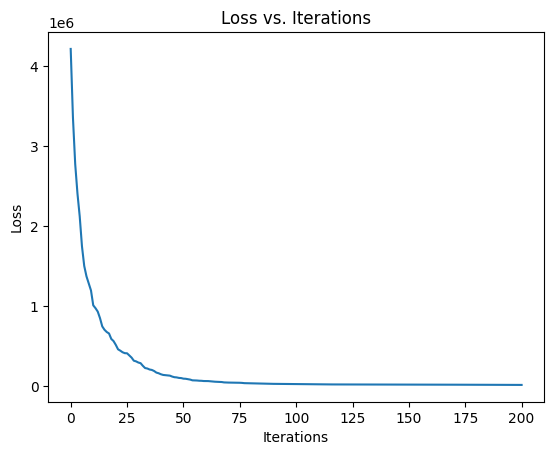

In [6]:
gb.plot_loss()

#### Cost Complexity Pruning

The approach mentioned above will yield a good decision tree for the **training data** but may not yield the same results for the test data or any predictions made after. This is due to the possibility of overfitting the model to the training data and making it too complex or too big to yield a small RSS. Thus, making the regression tree less complex or smaller might yield better results for the test data and predictions, lowering the variance and improving the interpretability in exchange for higher bias.\
*Cost Complexity Pruning* is one approach that simplifies the model by letting it grow bigger and more complex and then uses a cost function that penalizes complexity to *'prune'* or remove leaves to make the regression tree smaller and less complex. Now, rather than considering every possible subtree of the original tree, we consider a sequence of trees indexed by a nonnegative tuning parameter $\alpha$. Let $T_0$ be the biggest tree obtained that minimizes the RSS against the training data, each value of $\alpha$ corresponds to a subtree $T \subset T_0$ such that $$\sum_{m=1}^{|T|} \sum_{i:x_i \in R_m} (y_i - \hat{y}_{R_m})^2 + \alpha |T|$$ is the smallest, where $|T|$ is the number of termainal nodes or leaves of the tree $T$, $R_m$ is a region of the predictor space corresponing to the mth terminal node, and $\hat{y}_{R_m}$ is the predicted response associated with $R_m$. This cost function balances the trade-off between the complexity of the model and its fit to the training data, mitigating overfitting.

## Ensemble Learning

### Strong vs. Weak Learner

Methods like linear regression and decision tree training processes are classified as learners. They can be further categorized as strong or weak learners based on the accuracy of the models they produce. A method is considered a strong learner if it can, with high probability, accurately approximate the underlying function that relates input and output variables. In contrast, a weak learner produces approximations that perform only slightly better than random guessing. Generally, the depth of a decision tree training process determines whether or not it is a strong or weak learner; the more depth of the tree means the stronger learner it becomes. Ensemble learning is a method that combines many weak learners to create a stronger learner.

### Boosting

Boosting is one of many ensemble learning methods that uses a combination of weak learners to create a strong one. In our case, we will focus on decision trees as our weak learner.

#### Intuition Behind Gradient Descent

To build the intuition for gradient descent, let's consider the function $f(x) = x^2 +2$. Recall that  if we wanted to find values of $x$ where $f(x)$ has the minimum or maximum value (assuming it exist). We would use it's first derivative $f'(x)$ and solve for x using $$f'(x) = 0$$ which would give us the value(s) of $x$ where $f(x)$ has the minimum or maximum value, in this case $x=0$ is where $f(x)$ has the minimum value. Visually, since we already had the notion that $f'(x)$ evaluated at some $x^*$ is the slope of some line $h(x) = f'(x)x + h$ tangent to $f(x)$ at $x^*$, we could think of finding $x$ such that $f'(x) = 0$ as finding a tangent line that has a slope of $0$.

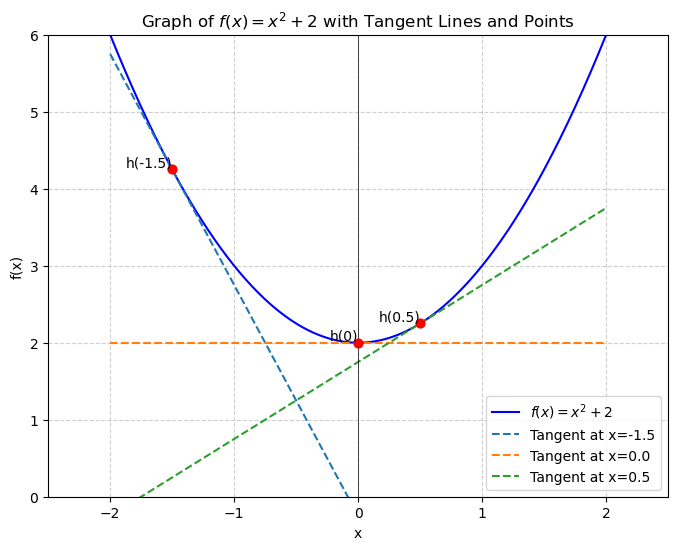

In [52]:
from intuition_vis import vis1
vis1()

Let $x_{min} = 0$, observe that as the value of $x^*$ approaches $x=x_{min}$, the slope of the tangent line $f'(x)$ also approaches $0$ and that when $x^* < x_{min}$, $f'(x) < 0$, and $x^* > x_{min}$, $f'(x) > 0$. Now, let's consider a new function $f(x) = 2x^4 - 3x^3 + 5x^2 - 7x + 4$ (which only has a global minimum), we do not know the value $x_{min}$ that would give the minimum value of $f(x)$, however, we can use the relationship earlier to our advantage to find or approximate $x_{min}$. What we could do is use an initial guess $x_0$ and calculate $f'(x)$, if $f'(x) < 0$, then it means $x^* < x_{min}$, thus we add some small step $\alpha$ to $x_0$ or if $f'(x) > 0$, then it means $x^* > x_{min}$, thus we deduct some small step $\alpha$ to $x_0$ and calculate $f'(x_0 + \alpha)$ or $f'(x_0 - \alpha)$ and repeat until $f'(x_{guess}) \approx 0$. If we reach a point where $x_{guess} - \alpha < x_{min} < x_{guess} + \alpha$, that is $f'(x_0 - \alpha) < 0 < f'(x_0 + \alpha)$, we can use smaller increments say $\beta = \dfrac{\alpha}{2}$ and use that instead.

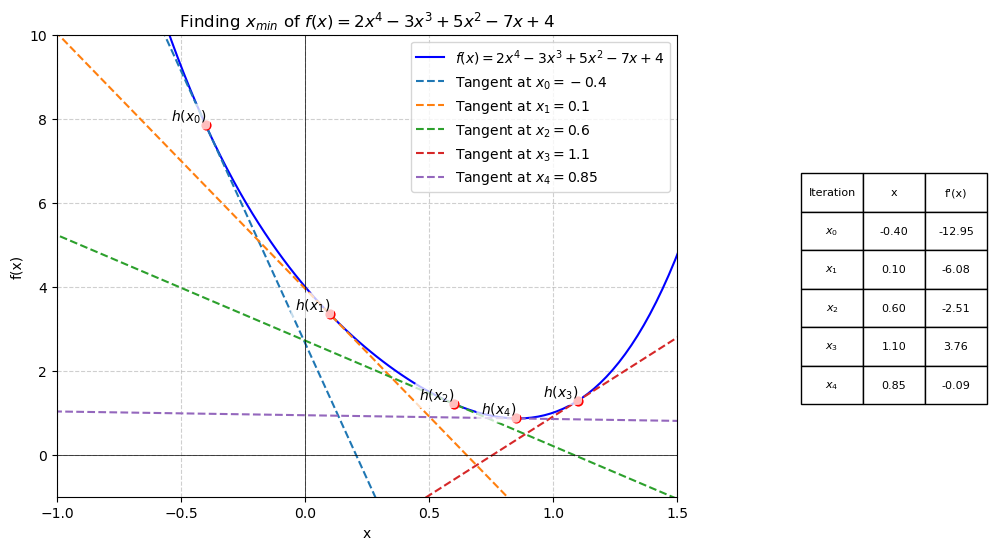

In [53]:
from intuition_vis import vis2
vis2()

Here we tried estimating $x_{min}$ by using the iterative method we mentioned above. We started at $x_0 = -0.4$ and use the increments $\alpha = 0.5$, which makes our update rule $x_{n+1} = x_{n} + \alpha$ if $f'(x_n) < 0$ and $x_{n+1} = x_{n} - \alpha$ if $f'(x_n) > 0$. In our case, this became the update rule until $x_3$, since it is clear that $f'(x_2) < 0 < f'(x_3)$ which means that $x_2 < x_{min} < x_3$. Hence we let $\beta = \dfrac{\alpha}{2}$ and use that increment instead, which gave us $x_4 = 0.85$ and $f'(x_4) = - 0.09$. We can repeatedly make the increments smaller until we get $f'(x_{guess}) \approx 0$ and thus can conclude that $x_{guess} \approx x_{min}$. Note that if we instead wanted to calculate for the maximum (if it exists, we would flip the < into > (and vice versa) and use same update rule). 

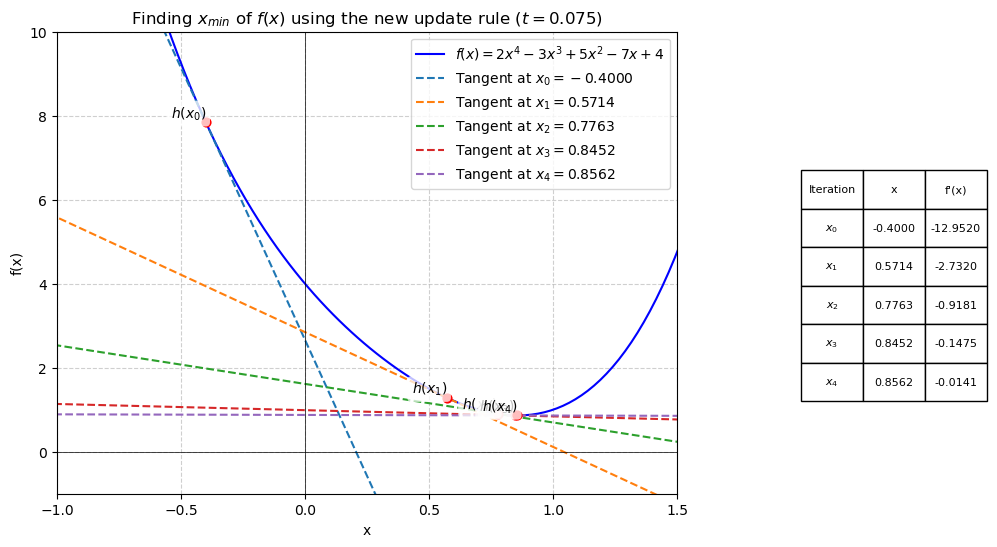

In [54]:
from intuition_vis import vis3
vis3()

This is the main idea behind gradient descent, if we wanted to minimize some function $f(x)$, we utilize the value of $f'(x)$ to essentially 'point' us to the right direction. In fact, we can even change our update rule earlier to reflect this, instead of using $\alpha$ we can let $f'(x_n)$ itself point us to the right direction, if let $x_{n+1} = x_{n} - tf'(x_n)$ for some small $t>0$ and we would get similar results as demonstrated above, this method is called gradient descent. [MIT, Lec07] [CMU, Gormley] \
Here, the small $t>0$ is what we call the learning rate, we can think of it as how big of a step we want take towards the right direction for every estimate. However, it is important to note that bigger steps, more often than not, does not yield better results. An analogy for using learning rates that are too large is using a ruler to measure the width of human hair.

We can use gradient descent to find a solution that minimizes some loss functions and by extension the empirical risk. However, in this example, we assumed that $f(x)$ is differentiable. But what if $f(x)$ is not differentiable or that there are 'kinks' in the graph?\
Consider $$f(x) =
\begin{cases} 
2x^4 - 3x^3 + 5x^2 - 7x + 4, & x > 0 \\
-15x + 4, & x \leq 0
\end{cases},$$ notice that it is not differentiable at $x = 0$.

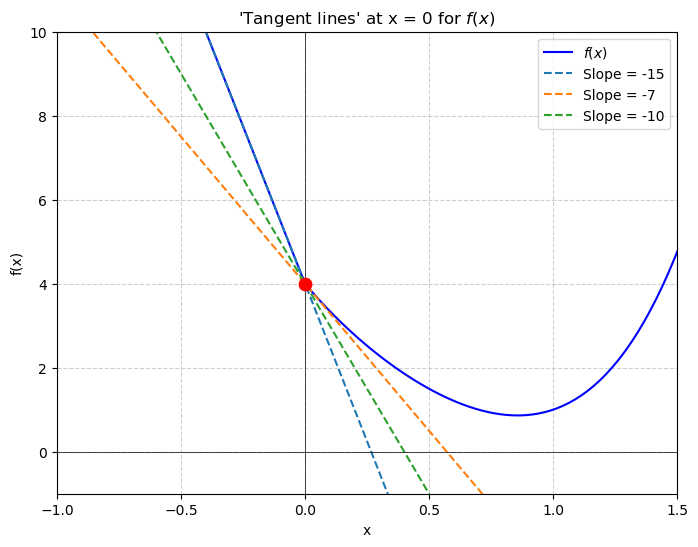

In [55]:
from intuition_vis import vis4
vis4()

However, observe that we can still draw multiple 'tangent lines' at $x = 0$ and if we are going pick our initial guess as $x_0 = 0$ and use the slope values of any one of the tangent lines at $x$, say $m = -10$, as a substitute for $f'(x_0)$ and run the algorithm above to find $x_{min}$, we would find out that we were still able to approximate the solution.

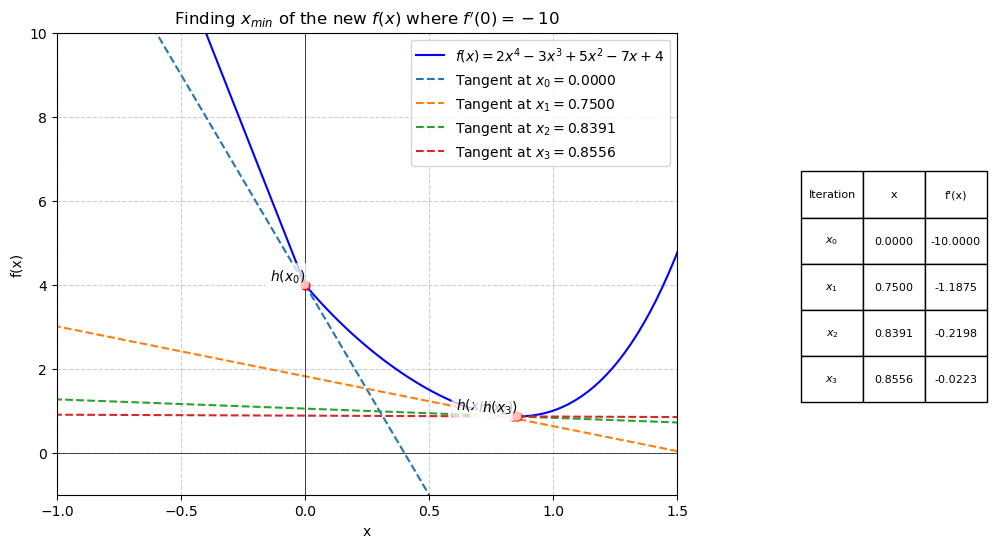

In [56]:
from intuition_vis import vis5
vis5()

In fact, we can define $f'(x) \in [-15, 7]$ whenever $x=0$ and our method would still be able to approximate the solution. Intuitively, $f'(0) \in [-15, 7]$ still points us to the solution even if $f(x)$ is not differentiable at $x$. This method is called subgradient and the multiple tangent lines that we considered above are called subderivatives.

#### (Steepest) Gradient Descent in Parametric Approach

To formalize our notion of the (steepest) gradient descent method, if we have some convex function $f(x)$ where $x = [x_1 \hspace{0.5em} x_2 \hspace{0.5em} \cdots \hspace{0.5em} x_n]^T$ and $f(x)$ has a minimum value evaluated at $x_{min}$. We can approximate $x_{min}$ using gradient descent by defining a sequence of $n$-dimensional vectors (or gradients) $\{r_m\}_1^M$ defined as 
\begin{align*}
r_m &=
\begin{bmatrix}
\dfrac{\partial f(x)}{\partial x_1} \\
\dfrac{\partial f(x)}{\partial x_2} \\
\vdots \\
\dfrac{\partial f(x)}{\partial x_n}
\end{bmatrix}_{x=x^{(m-1)}} \\
&= \nabla f(x^{(m-1)})
\end{align*}
where 
\begin{align*}
x^{(m)} &= \sum_{j=0}^m x_j \\
&= x^{(0)} - h\sum_{i=1}^m r_i
\end{align*} 
where $x^{(0)}$ is some initial guess and $h > 0$ is the learning rate. Here $-\nabla f(x^{(m-1)})$ is the 'steepest' descent, intuitively, it is the most 'correct' direction that we can take a step towards the solution. Our estimate for $x_{min}$ wil be 

\begin{align*}
x_{min} &\approx x^{(M)}
\end{align*}
[gradientdescent1.pdf]

##### Subgradients (CMU STAT 06-Gradients)

However, if $f(x)$ is not differentiable at some $x^{(m)}$, that is $\nabla f(x^{(m)})$ does not exist, we can instead use it's subgradient $h(x^{(m)})$ which satisfies the following $$h(y) - h(x^{(m)}) \geq g^T (y - x^{(m)}) \text{ for all }y$$ for any $g^T \in R^n$. We can then substitute $\nabla f(x^{(m)})$ with $h(x^{(m)})$ for the next iterate. However,  $-h(x^{(m)})$ might not necessarily be the 'steepest' descent or the 'correct' direction at this iterate thus careful monitoring during the iterate is needed when using subgradient and if possible pick $h(x^{(m)})$ that generally points us to the right solution. [Tibshirani] [lecture10-subgrad]

Numerically, we can follow the algorithm below

Algorithm 1 Gradient Descent \
1: Choose initial guess $x_0 ∈ R_n$ \
2: for $m = 1, 2, \dots , M$ do \
3:  Compute the gradient $r_m = \nabla f(x_{m-1}) \in R_n$ \
4:  Update the point: $x_{m} = x_{m-1} − r_m$ \
5: Stop when $||\nabla f(x_m)||_2 < \epsilon$ for some small $\epsilon > 0$

[Gormley][yung book]


Going back to the parametric approach, if we want to estimate some function $F(x)$ using a training dataset $\{(x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n)\}$, we can choose some parametrized function $F'(x;\phi)$ that may closely represent $F(x)$ and solve for the optimal parameters 
\begin{align*}
\phi^* &= \arg\min_{\phi} L(\phi) \\
&= \arg\min_{\phi} \dfrac{1}{n}\sum_{i=1}^{n} l(y_i,F'(x_i;\phi))
\end{align*} 
where $L(\phi)$ is the empirical risk (which would be a function of the parameters $\phi$) and $l(y_i,F'(x_i;\phi))$ is the defined loss function. If $L(\phi)$ is convex with respect to the parameters $\phi$, we can solve for the parameters $\phi^*$ using gradient descent. 

#### Gradient Boosting

To better understand gradient boosting, let's take a look back at how we can minimize $f(x) = 2x^4 - 3x^3 + 5x^2 - 7x + 4$ using gradient descent. We can approximate the parameters at which it is minimum by $$x_{min} = x^{(0)} - h \sum_{i=1}^M \nabla f(x^{(i-1)})$$ where $x^{(0)}$ is some initial guess and $M \in N$ is the total number of iterates. Intuitively, given our initial guess $x^{(0)}$, we can think of $h\nabla f(x^{(i-1)})$ as the correctional steps of our estimate towards the solution and that for every step $x^{(i)}$ we correct it with $h\nabla f(x^{(i-1)})$. To reframe it, we can think of every iterate we do as correcting our previous estimate's error.

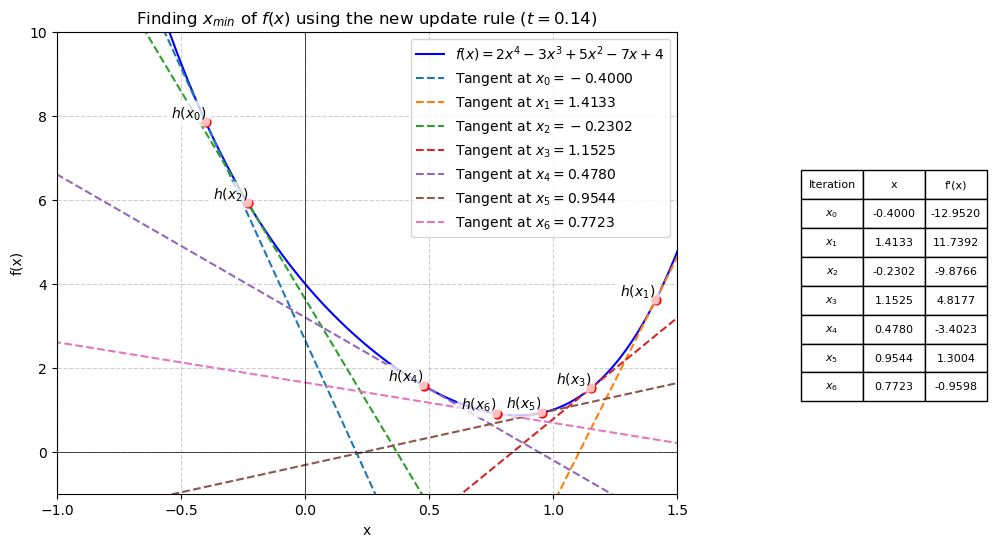

In [57]:
from intuition_vis import vis6
vis6()

To illustrate how each step in the gradient descent process corrects the error the previous iterate has, we deliberately set a larger learning rate $( t = 0.14 )$, making the updates more exaggerated.  

In the image, we see that each estimate $x_i$ alternates around the true solution $x_{min}$. This happens because the correction step, $t \nabla f(x^{(i-1)})$, overshoots the optimal point, causing the estimate to swing back and forth.
However, despite these oscillations, the algorithm still makes progress towards the minimum. Over multiple iterations, the errors are gradually corrected, and the estimate converges to the true solution $x_{min}$. Translating this to the context of minimizing loss functions, this means that every step attempts to reduce the loss function to get to its minimum.

Now, the main idea behind gradient boosting revolves around this notion. In this method, we create a sequence of weak learners that tries to correct the error left by the one before it, thus lower the loss at every correction, and use the weighted sum of all the trees as our final model. The key difference between gradient descent and gradient boosting in estimating some unknown function $F(x)$, given some dataset $\{(x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n)\}$, is that the former assumes the general form of the unkown function $F'(x,\phi)$ and tries to find the best parameters $\phi^*$ that minimizes some loss function $L(\phi)$, while the latter instead tries to create $F^*(x)$ that best represents $F(x)$ based on the available data. In this research, the weak learner we will be using are regression trees.

|    | Gradient Descent  | Gradient Boosting  |
|-----------|-----------|-----------|
| Problem Formulation  | $\displaystyle \phi^* = \arg\min_{\phi} L(\phi)$    | $\displaystyle F^*(x) = \arg\min_{F'(x)} L(F'(x))$    |
| Descent Direction at Step $m$ | $- \nabla L(\phi^{(m-1)})$ | $\displaystyle h^{(m-1)}(x) = \arg\min_{h(x)} \sum_{i=1}^n[- \nabla L(F^{(m-1)}(x_i))- h(x_i)]^2$ |  
| Correction Step | $\phi^{(m)} = \phi^{(m-1)} - h \nabla L(\phi^{(m-1)})$ | $\displaystyle F^{(m)} = F^{(m-1)}(x) - \lambda h^{(m-1)}(x)$ |
| Initial Estimate | Parameter $\phi^{(0)}$ | Weak learner $h^{(0)}$ |
| $F(x)$ Estimate | $F(x;\phi^*)$ where $\displaystyle \phi^* = \phi^{(0)} + h\sum_{m=1}^M \phi^{(m)}$ | $\displaystyle F^*(x) = h^{(0)} + \lambda \sum_{m=1}^M h^{(m)}$|

The table above will be used as a reference to demonstrate how gradient boosting is the non-parametric and data-driven analogue to gradient descent. As mentioned above, the main goal of gradient boosting is to generate $\displaystyle F^*(x) = \arg\min_{F'(x)} L(F'(x))$ such that it closely represents the actual function $F(x)$ given the dataset $\{(x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n)\}$. Much like gradient descent, we start with some initial guess $F^{(0)}(x)$ and slowly 'correct' it, reducing  $L(F^{(m)}(x))$ as the iterate $m$ goes on. However, one key difference between gradient descent and gradient boosting is how they 'correct' each estimates, unlike gradient descent, instead of using the gradient of the empirical risk, we improve the function estimate $F^{(m)}(x)$ by adding another function which is defined as $$h^{(m)}(x) = \arg\min_{h(x)} \sum_{i=1}^n[- \nabla L(F^{(m-1)}(x_i))- h(x_i)]^2,$$ this is because in gradient decsent, given the estimate $\phi^{(m)} = [\phi_1^{(m)} \hspace{0.5em} \phi_2^{(m)} \hspace{0.5em} \cdots \hspace{0.5em} \phi_p^{(m)}]^T$, our descent direction is given by
\begin{align*}
-\nabla L(\phi^{(m)}) &= -
\begin{bmatrix}
\dfrac{\partial L(\phi)}{\partial \phi_1} \\
\dfrac{\partial L(\phi)}{\partial \phi_2} \\
\vdots \\
\dfrac{\partial L(\phi)}{\partial \phi_p}
\end{bmatrix}_{\phi=\phi^{(m)}} \\
&= -
\begin{bmatrix}
\dfrac{\partial L(F(x;\phi))}{\partial \phi_1} \\
\dfrac{\partial L(F(x;\phi))}{\partial \phi_2} \\
\vdots \\
\dfrac{\partial L(F(x;\phi))}{\partial \phi_p}
\end{bmatrix}_{\phi=\phi^{(m)}} \\
\end{align*}
which is defined for every $x$, thus the resulting estimate from this method, say $F(x;\phi^*)$, will also be defined for every $x$. On the other hand, in gradient boosting, given the estimate $F^{(m)}(x)$ at step $m$, our descent direction will be given by
\begin{align*}
-\nabla L(F^{(m)}(x_i)) &= -
\begin{bmatrix}
\dfrac{\partial L(F(x_i))}{\partial F(x_i)} 
\end{bmatrix}_{F(x)=F^{(m)}(x)}. \\
\end{align*}
This, however, will only be defined for the data point $x_i$ and most likely have different values for $x_j$ whenever $j \neq i$, making our final estimate $F^*(x)$ only defined on our training data inputs $x_1, x_2, \ldots , x_n$. Thus, we want to generalize $L(F^{(m)}(x))$ for all values $x$. In a boosting approach, we typically just fit another weak learner $h^{(m)}(x)$ on $L(F^{(m)}(x))$ (also called pseudoresiduals), or in other words solve for $$h^{(m)}(x) = \arg\min_{h(x)} \sum_{i=1}^n[- \nabla L(F^{(m-1)}(x_i))- h(x_i)]^2.$$ We then use this $h^{(m)}(x)$ to improve the errors of our estimate $F^{(m)}(x)$ so that we can get the new estimate $F^{(m+1)}(x) = F^{(m)}(x) + h^{(m)}(x)$. This process would then yield the final estimate $$ F^*(x) = h^{(0)} + \lambda \sum_{m=1}^M h^{(m)}$$

**Gradient boosting when the loss function is the SSE** \
To further the intuition, consider the empirical risk $L(F'(x))$ with the loss function $$l(y,y_{pred}) = \dfrac{1}{2} (y-y_{pred})^2$$ where $y_{pred} = F'(x)$. Observe that 
\begin{align*}
\nabla L(F(x))
\end{align*}
Let $x_i$ be the predictor vector, $y_i$ be the response variable, $(X,Y) = \{(x_i,y_i): i \in I\}$ be our training data set, and $\{\hat{f}_n(x)\}$ where $n=1, \ldots ,p$ be a sequence of decision trees. We train a decision tree of depth $d$ using $(X,Y)$ and define output model as $\hat{f}_1(x)$. Then, for some $\lambda > 0$, we let $r_i = y_i - \lambda \hat{f}_{1}(x_i)$ for all $i \in I$ be the residuals, we again train a decision tree of depth $d$ but now using $(X,R) = \{(x_i,r_i): i \in I\}$ and define output model as $\hat{f}_2(x)$. We repeat this by letting $s_i = r_i - \lambda \hat{f}_{2}(x_i)$ for all $i \in I$ and training another decision tree using $(X,S) = \{(x_i,s_i): i \in I\}$ to get $\hat{f}_3(x)$, and so on. Then using the sequence of decision trees $\{\hat{f}_n(x)\}$, our final model will be $$\hat{f}(x) = \sum_{n = 1}^p \lambda \hat{f}_n(x).$$ The parameter $\lambda$ or the shrinkage parameter, serves as our learning rate. Note that this slow learning approach tends to perform better as it reduces the risk of overfitting and serves as a form of regularization which prevents the model in fitting the noise. \
This approach is one of any non-parametric methods 

#### Extreme Gradient Boosting (XGBoost)

**Intuition:** An optimized version of Gradient Boosting with faster training, regularization, and scalability.

- Uses **second-order gradients** (Hessian) for better optimization.
- **L1 & L2 regularization** (like Lasso and Ridge) to reduce overfitting.
- Parallelized and optimized for speed.
- Handles **missing values** efficiently.

##### Regularization

## Outlier Identification Methods for Time Series*

**find one*

## Principal Component Analysis

Principal component analysis is a method used to derive a low-dimension set of features from a large set of variables. This *dimension reduction* approach reduces the problem of creating a model of a respone with $p$ number of features to creating a model with just $m$ number of features where $m < p$. In particular, if we have the predictors $x_1, x_2, \ldots, x_{p-1}, x_p$, we can reduce the number of predictors to $z_1, z_2, \ldots, z_{m-1}, z_m$ where $m < p$, and that $z_i$ is a linear combination of $x_1, x_2, \ldots, x_{p-1}, x_p$. That is, $$z_j = \sum^p_{i=1} \phi_{ij} x_i$$ for some constants $\phi_{1j}, \phi_{2j}, \ldots, \phi_{pj}$ where $j = 1, 2, \ldots, m$. If done properly, the latter models can outperform the former. In our case, we will use principal component analysis to mitigate overfitting since we have a small amount of data relative to the number of features we wanted to use.

## Cross-Validation Method*

**find one* \
Check rolling window.